In [5]:
import pandas as pd
import numpy as np


In [113]:
df = pd.read_csv(r"C:\Users\adi33\Downloads\dataset1(csv).csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         99995 non-null   object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      99996 non-null   object
 5   Origin             99996 non-null   object
 6   Dest               99999 non-null   object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [19]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [21]:
df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [115]:
#
dep_time_mean = df['DepTime'].mean()
print("dep time mean is:",dep_time_mean)

dep time mean is: 1341.52388


In [29]:
#1
dep_time_median = df['DepTime'].median()
print("dep time median is:",dep_time_median)

dep time median is: 1330.0


In [33]:
#1
dep_time_std = df['DepTime'].std()
print("dep time Standard Deviation is:", dep_time_std)

dep time Standard Deviation is: 476.3784446151376


In [35]:
#2
carrier_distribution = df['UniqueCarrier'].value_counts()
top_carrier = carrier_distribution.idxmax()
top_carrier_count = carrier_distribution.max()

print("Distribution of flights by carrier:", carrier_distribution)
print("Carrier with the most flights:", top_carrier, "with", top_carrier_count, "flights")


Distribution of flights by carrier: UniqueCarrier
WN    15080
AA     9418
DL     8128
MQ     7442
OO     7390
UA     6876
US     6482
NW     6402
XE     5901
OH     4594
CO     4334
EV     3930
FL     3039
AS     2222
YV     2128
B6     1838
HP     1378
F9     1006
DH      966
HA      762
TZ      446
AQ      234
Name: count, dtype: int64
Carrier with the most flights: WN with 15080 flights


In [37]:
#3
day_distribution = df['DayOfWeek'].value_counts()
top_day = day_distribution.idxmax()
top_day_count = day_distribution.max()
print("Distribution of flights by day of the week:", day_distribution)
print("Day with the highest number of flights:", top_day, "with", top_day_count, "flights")


Distribution of flights by day of the week: DayOfWeek
c-4    14736
c-5    14657
c-2    14604
c-1    14569
c-3    14508
c-7    14097
c-6    12829
Name: count, dtype: int64
Day with the highest number of flights: c-4 with 14736 flights


In [39]:
#4
u_origin_count = df['Origin'].nunique()
u_dest_count = df['Dest'].nunique()
print("Number of Unique Origin airports:", u_origin_count)
print("Number of Unique Destination airports:", u_dest_count)


Number of Unique Origin airports: 289
Number of Unique Destination airports: 289


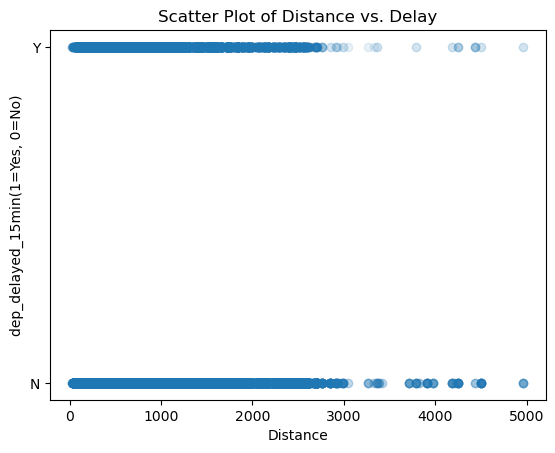

In [47]:
#5

import matplotlib.pyplot as plt

plt.scatter(df['Distance'], df['dep_delayed_15min'], alpha=0.1)
plt.xlabel('Distance')
plt.ylabel('dep_delayed_15min(1=Yes, 0=No)')
plt.title('Scatter Plot of Distance vs. Delay')
plt.show()



In [49]:
#6
average_distance_delayed = df[df['dep_delayed_15min'] == 1]['Distance'].mean()
average_distance_not_delayed = df[df['dep_delayed_15min'] == 0]['Distance'].mean()
print("Average distance for delayed flights:", average_distance_delayed)
print("Average distance for non-delayed flights:", average_distance_not_delayed)


Average distance for delayed flights: nan
Average distance for non-delayed flights: nan


In [51]:
#question 2 Beans Dataset


In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns


In [117]:
df = pd.read_csv(r"C:\Users\adi33\Downloads\Dataset2(csv).csv")

In [55]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13606 non-null  float64
 3   MinorAxisLength  13609 non-null  float64
 4   AspectRation     13608 non-null  float64
 5   Eccentricity     13608 non-null  float64
 6   ConvexArea       13610 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13608 non-null  float64
 9   Solidity         13610 non-null  float64
 10  roundness        13608 non-null  float64
 11  Compactness      13609 non-null  float64
 12  ShapeFactor1     13609 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [59]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13606.000000,13609.000000,13608.000000,13608.000000,13610.000000,13611.000000,13608.000000,13610.000000,13608.000000,13609.000000,13609.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.157483,202.271934,1.583306,0.750929,53769.027921,253.064220,0.749727,0.987143,0.873267,0.799845,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.704732,44.973272,0.246650,0.091961,29775.853140,59.177120,0.049089,0.004660,0.059518,0.061695,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.301679,175.842829,1.432357,0.715952,36713.750000,215.068003,0.718631,0.985670,0.832053,0.762449,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.909450,192.431733,1.551132,0.764444,45189.000000,238.438026,0.759830,0.988283,0.883132,0.801243,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.507661,217.033886,1.707187,0.810485,62298.500000,279.446467,0.786851,0.990013,0.916853,0.834244,0.007272,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
#DATA PREPROCESSING

In [61]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    5
MinorAxisLength    2
AspectRation       3
Eccentricity       3
ConvexArea         1
EquivDiameter      0
Extent             3
Solidity           1
roundness          3
Compactness        2
ShapeFactor1       2
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [83]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [87]:
label_enc = LabelEncoder()
df['Class'] = label_enc.fit_transform(df['Class'])

In [89]:
X = df.drop(columns=['Class'])
y = df['Class']

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [95]:
#MODEL SELECTION


models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Decision Tree Results:
Accuracy: 0.8905618802791039
Precision: 0.8910086383065979
Recall: 0.8905618802791039
F1 Score: 0.8907406261855789
Confusion Matrix:
 [[228   0  23   0   1   2   7]
 [  0 117   0   0   0   0   0]
 [ 23   0 285   0   8   0   1]
 [  1   0   0 592   4  11  63]
 [  5   0  12   3 379   0   9]
 [  3   0   0  21   0 377  12]
 [  7   0   1  58   9  14 447]]

Random Forest Results:
Accuracy: 0.922879177377892
Precision: 0.9234319703080054
Recall: 0.922879177377892
F1 Score: 0.9230720666251189
Confusion Matrix:
 [[236   0  17   0   1   1   6]
 [  0 117   0   0   0   0   0]
 [ 16   0 296   0   3   1   1]
 [  0   0   0 616   2   5  48]
 [  3   0   5   2 391   0   7]
 [  3   0   0  14   0 387   9]
 [  0   0   1  54   6   5 470]]

Support Vector Machine Results:
Accuracy: 0.9331619537275064
Precision: 0.933662010961743
Recall: 0.9331619537275064
F1 Score: 0.9333492160194374
Confusion Matrix:
 [[240   0  14   0   0   1   6]
 [  0 117   0   0   0   0   0]
 [ 11   0 300   0   4 

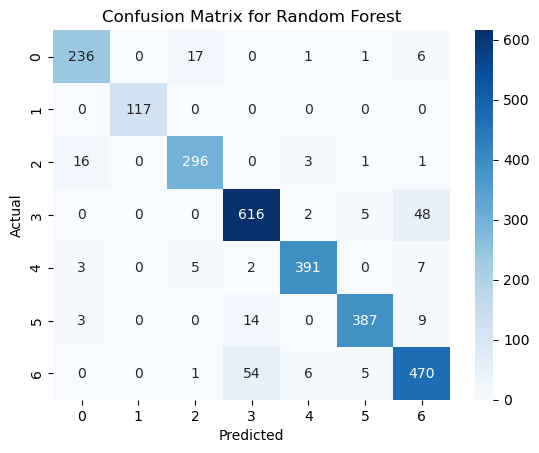

In [101]:
#MODEL EVALUATION

best_model = models['Random Forest']
y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


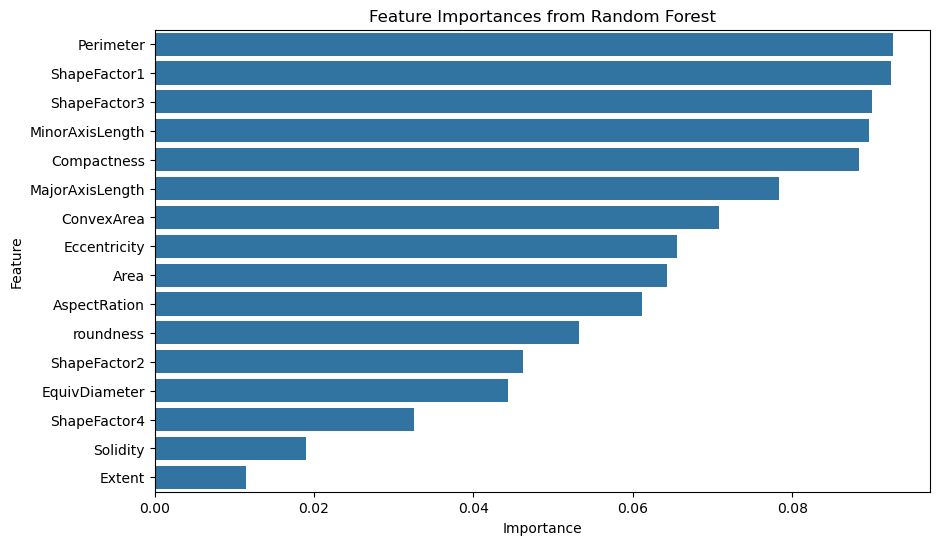

In [103]:
#FEATURE IMPORTANCE

feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


In [107]:
#HYPERPARAMETER TUNING

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

print("\nTuned Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tuned, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_tuned, average='weighted'))


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.9235857130624743

Tuned Model Performance:
Accuracy: 0.9261843554902681
Precision: 0.9266480106840992
Recall: 0.9261843554902681
F1 Score: 0.9263227291488391
